# Lab 1: Chart Basics

In [1]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from ipywidgets import interact, Checkbox, ColorPicker, IntSlider
import math

%matplotlib inline

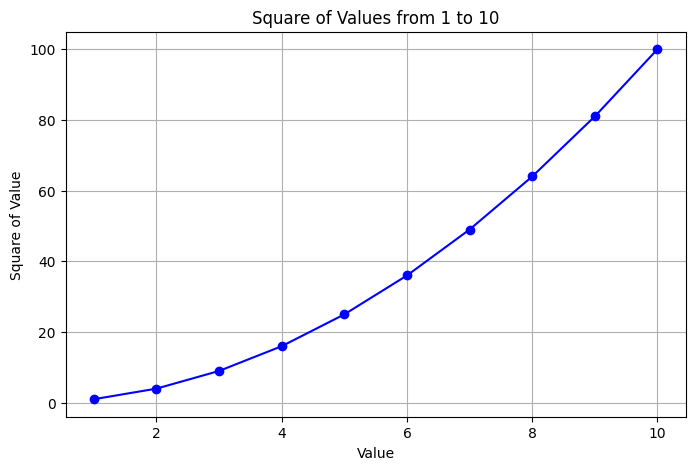

In [3]:
x = np.arange(1, 11)
y = x ** 2

plt.figure(figsize=(8,5))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title("Square of Values from 1 to 10")
plt.xlabel("Value")
plt.ylabel("Square of Value")
plt.grid(True)
plt.show()

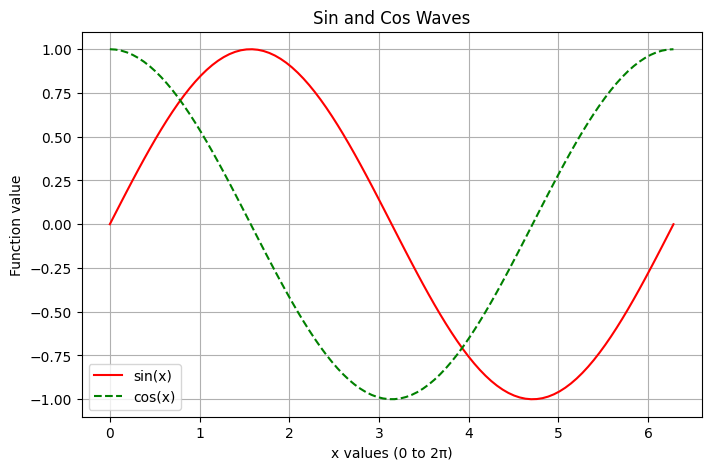

In [4]:
x = np.linspace(0, 2 * np.pi, 100)
sin_y = np.sin(x)
cos_y = np.cos(x)

plt.figure(figsize=(8,5))
plt.plot(x, sin_y, label='sin(x)', color='r', linestyle='-')
plt.plot(x, cos_y, label='cos(x)', color='g', linestyle='--')
plt.title("Sin and Cos Waves")
plt.xlabel("x values (0 to 2π)")
plt.ylabel("Function value")
plt.legend()
plt.grid(True)
plt.show()

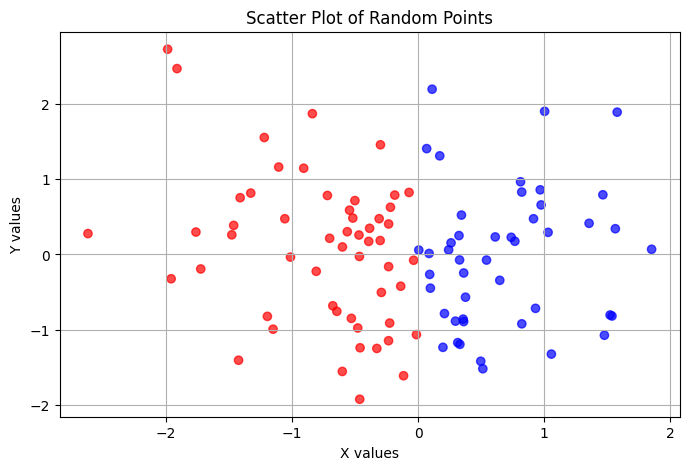

In [5]:
np.random.seed(42)
x = np.random.randn(100)
y = np.random.randn(100)
colors = ['blue' if val >= 0 else 'red' for val in x]

plt.figure(figsize=(8,5))
plt.scatter(x, y, c=colors, alpha=0.7)
plt.title("Scatter Plot of Random Points")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.grid(True)
plt.show()

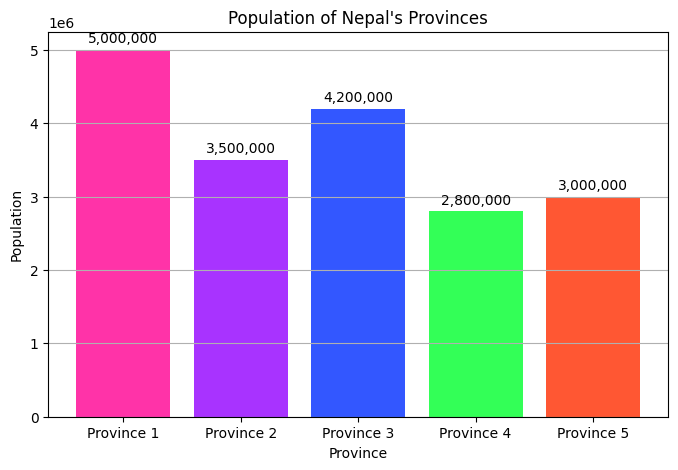

In [8]:
provinces = ['Province 1', 'Province 2', 'Province 3', 'Province 4', 'Province 5']
populations = [5000000, 3500000, 4200000, 2800000, 3000000]
colors = ['#FF33A8', '#A833FF', '#3357FF', '#33FF57', '#FF5733']

plt.figure(figsize=(8,5))
bars = plt.bar(provinces, populations, color=colors)
plt.title("Population of Nepal's Provinces")
plt.xlabel("Province")
plt.ylabel("Population")
plt.grid(axis='y')

# Label each bar with its population
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100000, f'{yval:,}', ha='center')

plt.show()

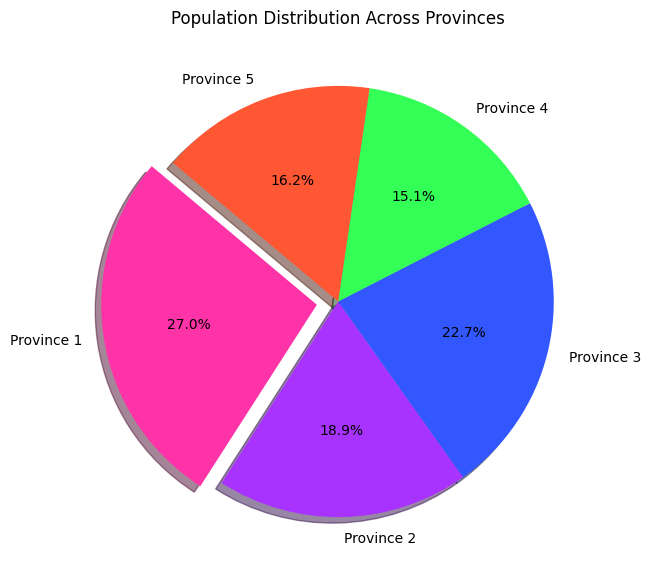

In [9]:
explode = [0.1 if pop == max(populations) else 0 for pop in populations]

plt.figure(figsize=(7,7))
plt.pie(populations, labels=provinces, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title("Population Distribution Across Provinces")
plt.show()

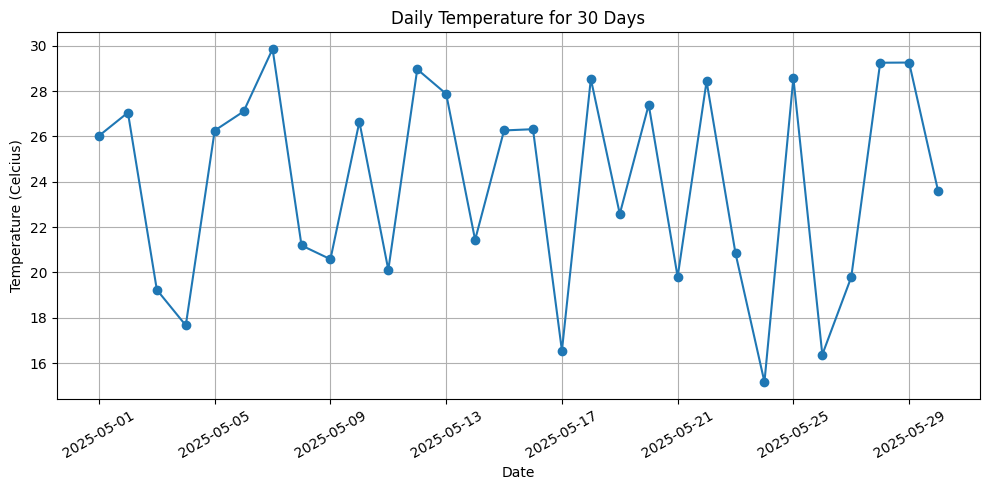

In [14]:
dates = pd.date_range(start='2025-05-01', periods=30)
temperatures = np.random.uniform(low=15, high=30, size=30)

df_temp = pd.DataFrame({'Date': dates, 'Temperature': temperatures})

plt.figure(figsize=(10,5))
plt.plot(df_temp['Date'], df_temp['Temperature'], marker='o', linestyle='-')
plt.title("Daily Temperature for 30 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (Celcius)")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

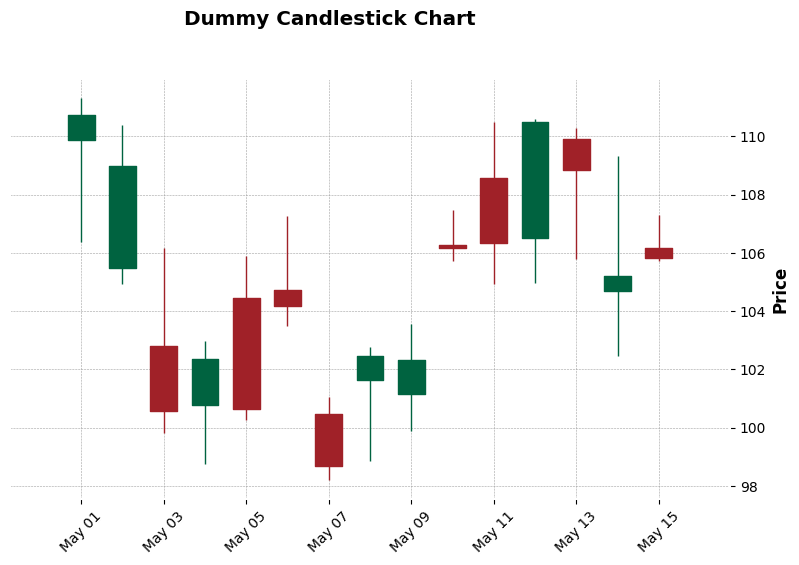

In [18]:
dates = pd.date_range(start='2025-05-01', periods=15)
np.random.seed(45)
open_prices = np.random.uniform(100, 110, size=15)
high_prices = open_prices + np.random.uniform(0, 5, size=15)
low_prices = open_prices - np.random.uniform(0, 5, size=15)
close_prices = np.random.uniform(low_prices, high_prices)

df_ohlc = pd.DataFrame({
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices
}, index=dates)

mpf.plot(df_ohlc, type='candle', style='charles', title='Dummy Candlestick Chart', figsize=(10,6))

In [20]:
def plot_functions(show_sin, show_cos, show_tan, color, points):
    x = np.linspace(0, 2 * np.pi, points)
    plt.figure(figsize=(10,6))

    if show_sin:
        plt.plot(x, np.sin(x), label='sin(x)', color=color)
    if show_cos:
        plt.plot(x, np.cos(x), label='cos(x)', color=color, linestyle='--')
    if show_tan:
        y_tan = np.tan(x)
        y_tan[np.abs(y_tan) > 10] = np.nan
        plt.plot(x, y_tan, label='tan(x)', color=color, linestyle=':')

    plt.title('Interactive Function Plotter')
    plt.xlabel('x')
    plt.ylabel('Function value')
    plt.legend()
    plt.grid(True)
    plt.ylim(-2, 2)
    plt.show()

interact(
    plot_functions,
    show_sin=Checkbox(value=True, description='sin'),
    show_cos=Checkbox(value=True, description='cos'),
    show_tan=Checkbox(value=False, description='tan'),
    color=ColorPicker(value='red', description='Color'),
    points=IntSlider(min=50, max=200, step=50, value=100, description='Points')
)


interactive(children=(Checkbox(value=True, description='sin'), Checkbox(value=True, description='cos'), Checkb…

<function __main__.plot_functions(show_sin, show_cos, show_tan, color, points)>